Nuevo enfoque...

El conjunto de datos de entrenamiento utilizado no tiene la capacidad de entrenar de forma correcta el modelo, ya que los datos no estan distribuídos de manera uniforme. Es por esto que se buscará generar un conjunto de datos de prueba artificial para entrenar el modelo. 

El conjunto de datos de entrenamiento artificial contará con la generación de: <br>
estados de fase (0,1,2) <br>
cantidad de vehículos en Agustinas (0-15)<br>
cantidad de vehículos en Morandé (0-15)<br>
cantidad de peatones en Agustinas (0-15)<br>
cantidad de peatones en Morandé (0-15)<br>
tiempo de espera acumulado en Agustinas (0-2000)<br>
tiempo de espera acumulado en Morandé (0-2000)

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import joblib

In [2]:
# Sintetización de espacio de estados
from itertools import product

fase = range(0, 3)
cantidades_10 = range(0, 11)
cantidades_16 = range(0, 17)
esperas_2000 = range(0,2006,5)
esperas_1700 = range(0,1706,5) 
combinaciones = list(product(fase, cantidades_16, esperas_2000, cantidades_10, esperas_1700))
df_generado = pd.DataFrame(combinaciones, columns=['sem_fase', 'veh_agus','wait_agus','veh_mor','wait_mor'])

In [3]:
print(df_generado)

          sem_fase  veh_agus  wait_agus  veh_mor  wait_mor
0                0         0          0        0         0
1                0         0          0        0         5
2                0         0          0        0        10
3                0         0          0        0        15
4                0         0          0        0        20
...            ...       ...        ...      ...       ...
77128519         2        16       2005       10      1685
77128520         2        16       2005       10      1690
77128521         2        16       2005       10      1695
77128522         2        16       2005       10      1700
77128523         2        16       2005       10      1705

[77128524 rows x 5 columns]


In [4]:
# Selección de muestras
df_sample_100k = df_generado.sample(n=250000)
df_sample_50k = df_generado.sample(n=50000)
df_sample_10k = df_generado.sample(n=10000)

In [5]:
# Aplicar reglas de optimización

def reglas_optimizacion(row):
    wait_threshold = 500
    max_veh_threshold = 2
    if row['sem_fase'] == 1 and row['veh_agus'] <= max_veh_threshold and row['wait_mor'] > wait_threshold:
        return 1
    elif row['sem_fase'] == 0 and row['veh_mor'] <= max_veh_threshold and row['wait_agus'] > wait_threshold:
        return 1
    else:
        return 0

In [6]:

df_sample_100k['Y'] = df_sample_100k.apply(reglas_optimizacion, axis=1)

df_sample_50k['Y'] = df_sample_50k.apply(reglas_optimizacion, axis=1)

df_sample_10k['Y'] = df_sample_10k.apply(reglas_optimizacion, axis=1)

In [7]:
# Verificar % de casos favorables

print(f"Casos favorables 100K: {df_sample_100k['Y'].mean()}")
print(f"Casos favorables 50K: {df_sample_50k['Y'].mean()}")
print(f"Casos favorables 10K: {df_sample_10k['Y'].mean()}")


Casos favorables 100K: 0.109208
Casos favorables 50K: 0.11162
Casos favorables 10K: 0.1163


In [14]:
! pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 8.3/8.3 MB 40.8 MB/s eta 0:00:00
     ---------------------------------------- 298.0/298.0 kB ? eta 0:00:00


In [15]:
# Dividir conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [17]:
#Splitting the dataset into training and validation sets (100k)
training_set_100k, validation_set_100k = train_test_split(df_sample_100k, test_size = 0.25, random_state = 3)

#classifying the predictors and target variables as X and Y
X_train_100k = training_set_100k.iloc[:,0:-1].values
X_test_100k = validation_set_100k.iloc[:,0:-1].values
Y_train_100k = training_set_100k.iloc[:,-1].values
Y_test_100k = validation_set_100k.iloc[:,-1].values

#Splitting the dataset into training and validation sets (50k)
training_set_50k, validation_set_50k = train_test_split(df_sample_50k, test_size = 0.25, random_state = 3)

#classifying the predictors and target variables as X and Y
X_train_50k = training_set_50k.iloc[:,0:-1].values
X_test_50k = validation_set_50k.iloc[:,0:-1].values
Y_train_50k = training_set_50k.iloc[:,-1].values
Y_test_50k = validation_set_50k.iloc[:,-1].values

#Splitting the dataset into training and validation sets (10k)
training_set_10k, validation_set_10k = train_test_split(df_sample_10k, test_size = 0.25, random_state = 3)

#classifying the predictors and target variables as X and Y
X_train_10k = training_set_10k.iloc[:,0:-1].values
X_test_10k = validation_set_10k.iloc[:,0:-1].values
Y_train_10k = training_set_10k.iloc[:,-1].values
Y_test_10k = validation_set_10k.iloc[:,-1].values

In [18]:
# Entrenamiento de modelo

from sklearn.neural_network import MLPClassifier

In [19]:
# 100k
model_100k_16 = MLPClassifier(hidden_layer_sizes=(16,), max_iter=2500, activation='relu', solver='adam', random_state=7)
# Fitting the training data to the network
model_100k_16.fit(X_train_100k, Y_train_100k)

model_100k_32 = MLPClassifier(hidden_layer_sizes=(32,), max_iter=2500, activation='relu', solver='adam', random_state=7)
# Fitting the training data to the network
model_100k_32.fit(X_train_100k, Y_train_100k)

model_100k_64 = MLPClassifier(hidden_layer_sizes=(64,), max_iter=2500, activation='relu', solver='adam', random_state=7)
# Fitting the training data to the network


In [20]:
model_100k_64.fit(X_train_100k, Y_train_100k)

MLPClassifier(hidden_layer_sizes=(64,), max_iter=2500, random_state=7)

In [27]:
model_100k_32.fit(X_train_100k, Y_train_100k)

MLPClassifier(hidden_layer_sizes=(32,), max_iter=2500, random_state=7)

In [21]:
model_100k_64.fit(X_train_100k, Y_train_100k)

MLPClassifier(hidden_layer_sizes=(64,), max_iter=2500, random_state=7)

In [21]:
# 50k
model_50k_16 = MLPClassifier(hidden_layer_sizes=(16,), max_iter=2500, activation='relu', solver='adam', random_state=1)
# Fitting the training data to the network
model_50k_16.fit(X_train_50k, Y_train_50k)

model_50k_32 = MLPClassifier(hidden_layer_sizes=(32,), max_iter=2500, activation='relu', solver='adam', random_state=1)
# Fitting the training data to the network
model_50k_32.fit(X_train_50k, Y_train_50k)

model_50k_64 = MLPClassifier(hidden_layer_sizes=(64,), max_iter=2500, activation='relu', solver='adam', random_state=1)
# Fitting the training data to the network
model_50k_64.fit(X_train_50k, Y_train_50k)

MLPClassifier(hidden_layer_sizes=(64,), max_iter=2500, random_state=1)

In [22]:
model_50k_16.fit(X_train_50k, Y_train_50k)

MLPClassifier(hidden_layer_sizes=(16,), max_iter=2500, random_state=1)

In [23]:
model_50k_32.fit(X_train_50k, Y_train_50k)

MLPClassifier(hidden_layer_sizes=(32,), max_iter=2500, random_state=1)

In [24]:
model_50k_64.fit(X_train_50k, Y_train_50k)

MLPClassifier(hidden_layer_sizes=(64,), max_iter=2500, random_state=1)

In [22]:
# 10k
model_10k_16 = MLPClassifier(hidden_layer_sizes=(16,), max_iter=10000, activation='relu', solver='adam', random_state=1)
# Fitting the training data to the network
model_10k_16.fit(X_train_10k, Y_train_10k)

model_10k_32 = MLPClassifier(hidden_layer_sizes=(32,), max_iter=10000, activation='relu', solver='adam', random_state=1)
# Fitting the training data to the network
model_10k_32.fit(X_train_10k, Y_train_10k)

model_10k_64 = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10000, activation='relu', solver='adam', random_state=1)
# Fitting the training data to the network
model_10k_64.fit(X_train_10k, Y_train_10k)

MLPClassifier(hidden_layer_sizes=(64,), max_iter=10000, random_state=1)

In [25]:
model_10k_16.fit(X_train_10k, Y_train_10k)

MLPClassifier(hidden_layer_sizes=(16,), max_iter=10000, random_state=1)

In [26]:
model_10k_32.fit(X_train_10k, Y_train_10k)

MLPClassifier(hidden_layer_sizes=(32,), max_iter=10000, random_state=1)

In [29]:
model_10k_64.fit(X_train_10k, Y_train_10k)

MLPClassifier(hidden_layer_sizes=(64,), max_iter=10000, random_state=1)

In [24]:
# LOSS CURVES
loss_curve_100k_64 = model_100k_64.loss_curve_
loss_curve_100k_32 = model_100k_32.loss_curve_
loss_curve_100k_16 = model_100k_16.loss_curve_


loss_curve_50k_64 = model_50k_64.loss_curve_
loss_curve_50k_32 = model_50k_32.loss_curve_
loss_curve_50k_16 = model_50k_16.loss_curve_


loss_curve_10k_64 = model_10k_64.loss_curve_
loss_curve_10k_32 = model_10k_32.loss_curve_
loss_curve_10k_16 = model_10k_16.loss_curve_




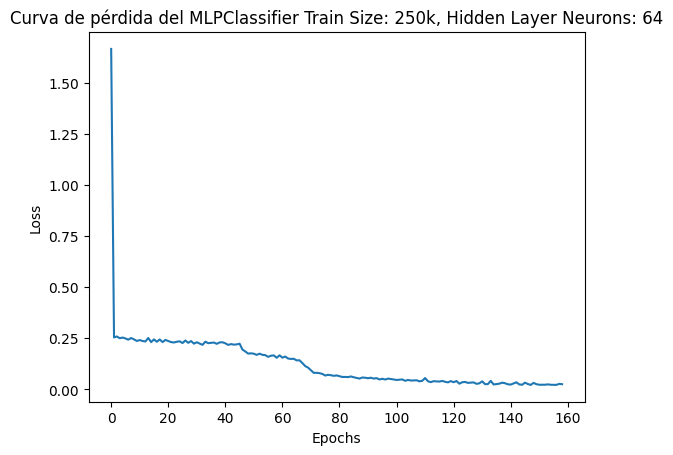

In [26]:
# Grafica la curva de pérdida (loss curve) del modelo
plt.plot(loss_curve_100k_64)
plt.title('Curva de pérdida del MLPClassifier Train Size: 250k, Hidden Layer Neurons: 64')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

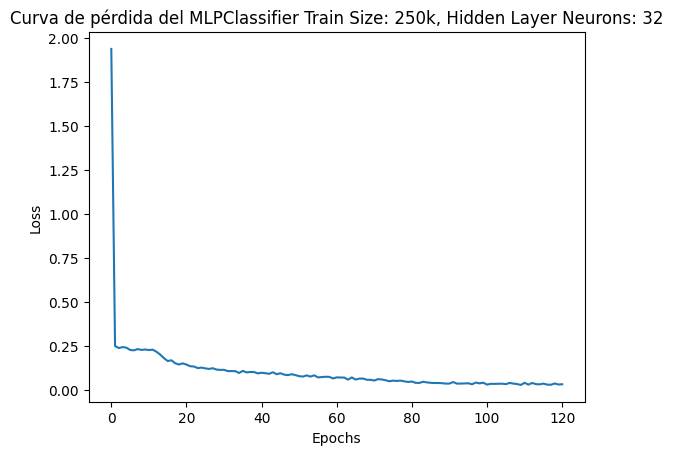

In [28]:
# Grafica la curva de pérdida (loss curve) del modelo
plt.plot(loss_curve_100k_32)
plt.title('Curva de pérdida del MLPClassifier Train Size: 250k, Hidden Layer Neurons: 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

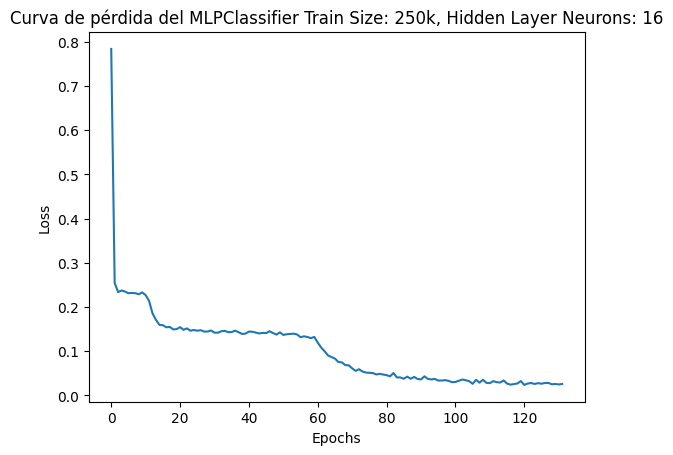

In [30]:
# Grafica la curva de pérdida (loss curve) del modelo
plt.plot(loss_curve_100k_16)
plt.title('Curva de pérdida del MLPClassifier Train Size: 250k, Hidden Layer Neurons: 16')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

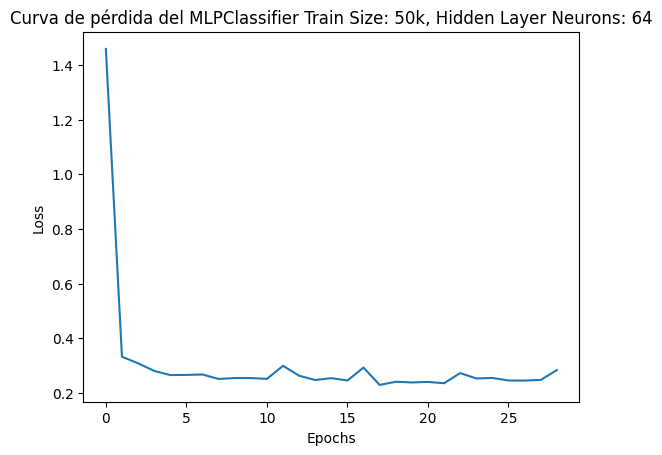

In [37]:
# Grafica la curva de pérdida (loss curve) del modelo
plt.plot(loss_curve_50k_64)
plt.title('Curva de pérdida del MLPClassifier Train Size: 50k, Hidden Layer Neurons: 64')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

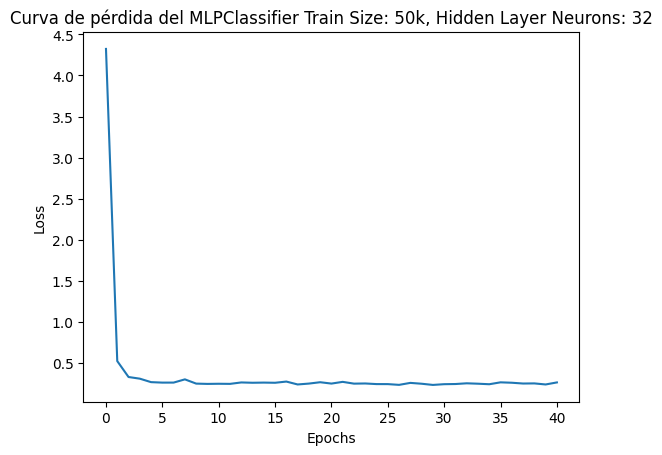

In [38]:
# Grafica la curva de pérdida (loss curve) del modelo
plt.plot(loss_curve_50k_32)
plt.title('Curva de pérdida del MLPClassifier Train Size: 50k, Hidden Layer Neurons: 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

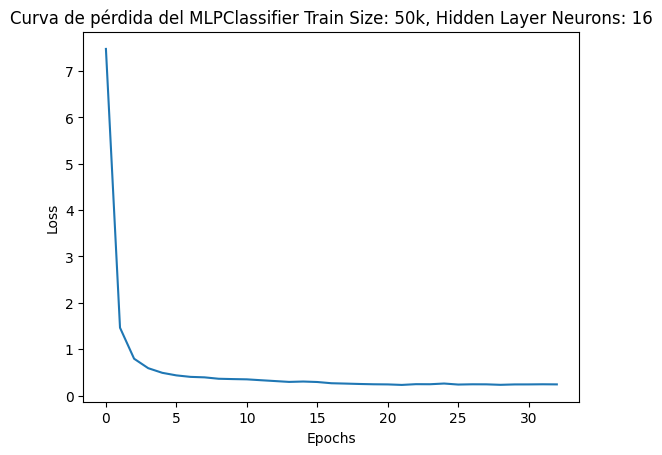

In [39]:
# Grafica la curva de pérdida (loss curve) del modelo
plt.plot(loss_curve_50k_16)
plt.title('Curva de pérdida del MLPClassifier Train Size: 50k, Hidden Layer Neurons: 16')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

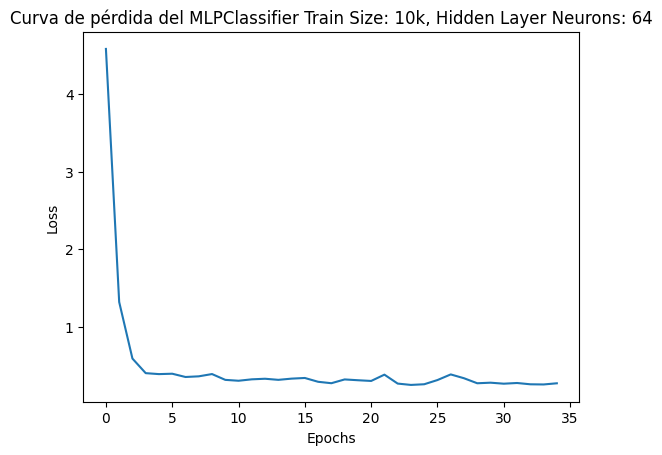

In [40]:
# Grafica la curva de pérdida (loss curve) del modelo
plt.plot(loss_curve_10k_64)
plt.title('Curva de pérdida del MLPClassifier Train Size: 10k, Hidden Layer Neurons: 64')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

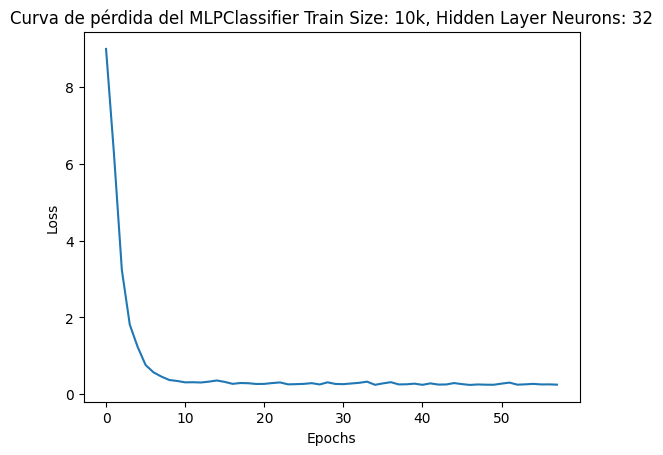

In [42]:
# Grafica la curva de pérdida (loss curve) del modelo
plt.plot(loss_curve_10k_32)
plt.title('Curva de pérdida del MLPClassifier Train Size: 10k, Hidden Layer Neurons: 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

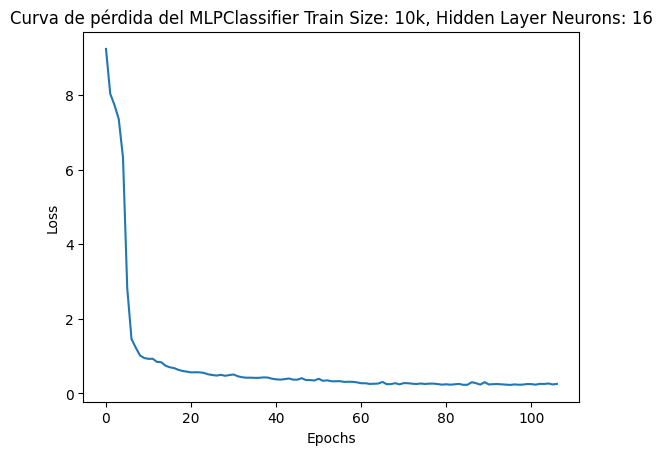

In [44]:
# Grafica la curva de pérdida (loss curve) del modelo
plt.plot(loss_curve_10k_16)
plt.title('Curva de pérdida del MLPClassifier Train Size: 10k, Hidden Layer Neurons: 16')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix

In [47]:
# Matrices de confusión 250k

y_pred_250k_64 = model_100k_64.predict(X_test_100k)
cm_250k_64 = confusion_matrix(Y_test_100k, y_pred_250k_64)
print(cm_250k_64)

y_pred_250k_32 = model_100k_32.predict(X_test_100k)
cm_250k_32 = confusion_matrix(Y_test_100k, y_pred_250k_32)
print(cm_250k_32)

y_pred_250k_16 = model_100k_16.predict(X_test_100k)
cm_250k_16 = confusion_matrix(Y_test_100k, y_pred_250k_16)
print(cm_250k_16)


[[55623    40]
 [  423  6414]]
[[55629    34]
 [  369  6468]]
[[55410   253]
 [  374  6463]]


In [48]:
# Matrices de confusión 250k

y_pred_50k_64 = model_50k_64.predict(X_test_50k)
cm_50k_64 = confusion_matrix(Y_test_50k, y_pred_50k_64)
print(cm_50k_64)

y_pred_50k_32 = model_50k_32.predict(X_test_50k)
cm_50k_32 = confusion_matrix(Y_test_50k, y_pred_50k_32)
print(cm_50k_32)

y_pred_50k_16 = model_50k_16.predict(X_test_50k)
cm_50k_16 = confusion_matrix(Y_test_50k, y_pred_50k_16)
print(cm_50k_16)

[[10277   843]
 [  455   925]]
[[10277   843]
 [  547   833]]
[[11021    99]
 [  928   452]]


In [49]:
# Matrices de confusión 50k

y_pred_50k_64 = model_50k_64.predict(X_test_50k)
cm_50k_64 = confusion_matrix(Y_test_50k, y_pred_50k_64)
print(cm_50k_64)

y_pred_50k_32 = model_50k_32.predict(X_test_50k)
cm_50k_32 = confusion_matrix(Y_test_50k, y_pred_50k_32)
print(cm_50k_32)

y_pred_50k_16 = model_50k_16.predict(X_test_50k)
cm_50k_16 = confusion_matrix(Y_test_50k, y_pred_50k_16)
print(cm_50k_16)

[[10277   843]
 [  455   925]]
[[10277   843]
 [  547   833]]
[[11021    99]
 [  928   452]]


In [51]:
# Matrices de confusión 10k

y_pred_10k_64 = model_10k_64.predict(X_test_10k)
cm_10k_64 = confusion_matrix(Y_test_10k, y_pred_10k_64)
print(cm_10k_64)

y_pred_10k_32 = model_10k_32.predict(X_test_10k)
cm_10k_32 = confusion_matrix(Y_test_10k, y_pred_10k_32)
print(cm_10k_32)

y_pred_10k_16 = model_10k_16.predict(X_test_10k)
cm_10k_16 = confusion_matrix(Y_test_10k, y_pred_10k_16)
print(cm_10k_16)

[[2214    3]
 [ 271   12]]
[[2096  121]
 [ 151  132]]
[[2082  135]
 [ 116  167]]


In [65]:
cm_250k_16

array([[55410,   253],
       [  374,  6463]], dtype=int64)

In [67]:
# Evaluadores

TN = cm_250k_16[0][0]
FP = cm_250k_16[0][1]
FN = cm_250k_16[1][0]
TP = cm_250k_16[1][1]

print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print(f"TP: {TP}")

precision = (TN + TP) / (TN + FP + FN + TP)
recall = TP / (FN + TP)
specificity = TN / (FP + TN)
F1 = 2 * (precision * recall) / (precision + recall)

print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"specificity: {specificity}")
print(f"F1: {F1}")

TN: 55410
FP: 253
FN: 374
TP: 6463
precision: 0.989968
recall: 0.9452976451660084
specificity: 0.9954547904352982
F1: 0.9671172756331632


In [69]:
# Evaluadores

TN = cm_250k_32[0][0]
FP = cm_250k_32[0][1]
FN = cm_250k_32[1][0]
TP = cm_250k_32[1][1]

print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print(f"TP: {TP}")

precision = (TN + TP) / (TN + FP + FN + TP)
recall = TP / (FN + TP)
specificity = TN / (FP + TN)
F1 = 2 * (precision * recall) / (precision + recall)

print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"specificity: {specificity}")
print(f"F1: {F1}")

TN: 55629
FP: 34
FN: 369
TP: 6468
precision: 0.993552
recall: 0.9460289600702062
specificity: 0.9993891813233207
F1: 0.969208282289646


In [71]:
# Evaluadores

TN = cm_250k_64[0][0]
FP = cm_250k_64[0][1]
FN = cm_250k_64[1][0]
TP = cm_250k_64[1][1]

print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print(f"TP: {TP}")

precision = (TN + TP) / (TN + FP + FN + TP)
recall = TP / (FN + TP)
specificity = TN / (FP + TN)
F1 = 2 * (precision * recall) / (precision + recall)

print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"specificity: {specificity}")
print(f"F1: {F1}")

TN: 55623
FP: 40
FN: 423
TP: 6414
precision: 0.992592
recall: 0.9381307591048705
specificity: 0.999281389792142
F1: 0.9645932664854893


In [72]:
# Evaluadores

TN = cm_50k_16[0][0]
FP = cm_50k_16[0][1]
FN = cm_50k_16[1][0]
TP = cm_50k_16[1][1]

print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print(f"TP: {TP}")

precision = (TN + TP) / (TN + FP + FN + TP)
recall = TP / (FN + TP)
specificity = TN / (FP + TN)
F1 = 2 * (precision * recall) / (precision + recall)

print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"specificity: {specificity}")
print(f"F1: {F1}")

TN: 11021
FP: 99
FN: 928
TP: 452
precision: 0.91784
recall: 0.32753623188405795
specificity: 0.9910971223021583
F1: 0.48278720498409416


In [74]:
# Evaluadores

TN = cm_50k_32[0][0]
FP = cm_50k_32[0][1]
FN = cm_50k_32[1][0]
TP = cm_50k_32[1][1]

print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print(f"TP: {TP}")

precision = (TN + TP) / (TN + FP + FN + TP)
recall = TP / (FN + TP)
specificity = TN / (FP + TN)
F1 = 2 * (precision * recall) / (precision + recall)

print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"specificity: {specificity}")
print(f"F1: {F1}")

TN: 10277
FP: 843
FN: 547
TP: 833
precision: 0.8888
recall: 0.6036231884057971
specificity: 0.9241906474820144
F1: 0.7189653632066126


In [76]:
# Evaluadores

TN = cm_50k_64[0][0]
FP = cm_50k_64[0][1]
FN = cm_50k_64[1][0]
TP = cm_50k_64[1][1]

print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print(f"TP: {TP}")

precision = (TN + TP) / (TN + FP + FN + TP)
recall = TP / (FN + TP)
specificity = TN / (FP + TN)
F1 = 2 * (precision * recall) / (precision + recall)

print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"specificity: {specificity}")
print(f"F1: {F1}")

TN: 10277
FP: 843
FN: 455
TP: 925
precision: 0.89616
recall: 0.6702898550724637
specificity: 0.9241906474820144
F1: 0.7669405497745109


In [78]:
# Evaluadores

TN = cm_10k_16[0][0]
FP = cm_10k_16[0][1]
FN = cm_10k_16[1][0]
TP = cm_10k_16[1][1]

print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print(f"TP: {TP}")

precision = (TN + TP) / (TN + FP + FN + TP)
recall = TP / (FN + TP)
specificity = TN / (FP + TN)
F1 = 2 * (precision * recall) / (precision + recall)

print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"specificity: {specificity}")
print(f"F1: {F1}")

TN: 2082
FP: 135
FN: 116
TP: 167
precision: 0.8996
recall: 0.5901060070671378
specificity: 0.939106901217862
F1: 0.7127035286683548


In [80]:
# Evaluadores

TN = cm_10k_32[0][0]
FP = cm_10k_32[0][1]
FN = cm_10k_32[1][0]
TP = cm_10k_32[1][1]

print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print(f"TP: {TP}")

precision = (TN + TP) / (TN + FP + FN + TP)
recall = TP / (FN + TP)
specificity = TN / (FP + TN)
F1 = 2 * (precision * recall) / (precision + recall)

print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"specificity: {specificity}")
print(f"F1: {F1}")

TN: 2096
FP: 121
FN: 151
TP: 132
precision: 0.8912
recall: 0.4664310954063604
specificity: 0.9454217410915652
F1: 0.6123657503612612


In [81]:
# Evaluadores

TN = cm_10k_64[0][0]
FP = cm_10k_64[0][1]
FN = cm_10k_64[1][0]
TP = cm_10k_64[1][1]

print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print(f"TP: {TP}")

precision = (TN + TP) / (TN + FP + FN + TP)
recall = TP / (FN + TP)
specificity = TN / (FP + TN)
F1 = 2 * (precision * recall) / (precision + recall)

print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"specificity: {specificity}")
print(f"F1: {F1}")

TN: 2214
FP: 3
FN: 271
TP: 12
precision: 0.8904
recall: 0.04240282685512368
specificity: 0.9986468200270636
F1: 0.08095060594765122


In [14]:
# Learning curves
from sklearn.model_selection import learning_curve

In [31]:
train_sizes = np.linspace(0.1, 1.0, 10)
print(train_sizes)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [42]:
X_train_100k

array([[   1,   11, 1745,   10,  290],
       [   2,   11,  425,    6,  190],
       [   1,   13,  570,    4, 1125],
       ...,
       [   2,   14,   45,    0, 1165],
       [   1,    0,  770,    0, 1490],
       [   0,    3, 1015,    6, 1145]], dtype=int64)

In [43]:
Y_train_100k

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

[learning_curve] Training set sizes: [ 15000  30000  45000  60000  75000  90000 105000 120000 135000 150000]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.917, test=0.916) total time=   1.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] END ..................., score=(train=0.917, test=0.916) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV] END ..................., score=(train=0.885, test=0.880) total time=   1.9s
[CV] END ..................., score=(train=0.917, test=0.918) total time=   2.9s
[CV] END ..................., score=(train=0.921, test=0.919) total time=   5.5s
[CV] END ..................., score=(train=0.920, test=0.919) total time=   3.5s
[CV] END ..................., score=(train=0.920, test=0.919) total time=   3.3s
[CV] END ..................., score=(train=0.911, test=0.911) total time=  10.3s
[CV] END ..................., score=(train=0.940, test=0.941) total time=   9.1s
[CV] END ..................., score=(train=0.921, test=0.920) total time=   6.0s
[CV] END ..................., score=(train=0.917, test=0.920) total time=   0.9s
[CV] END ..................., score=(train=0.917, test=0.920) total time=   1.4s
[CV] END ..................., score=(train=0.921, test=0.924) total time=   2.0s
[CV] END ..................., score=(train=0.874, test=0.876) total time=   3.9s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.4min finished


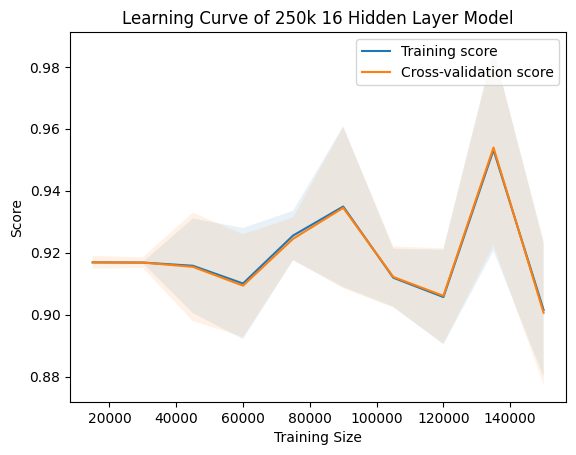

In [41]:
# 100k 16

# Obtenemos los scores de entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_sizes_100k, train_scores_100k, valid_scores_100k = learning_curve(model_100k_16, X_train_100k, Y_train_100k, train_sizes=train_sizes, verbose=3)
print(f"Train scores: {train_scores_100k}")
print(f"Valid scores: {valid_scores_100k}")

# Calculamos las medias y desviaciones estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores_100k, axis=1)
train_std = np.std(train_scores_100k, axis=1)
valid_mean = np.mean(valid_scores_100k, axis=1)
valid_std = np.std(valid_scores_100k, axis=1)

print(f"Train_mean: {train_mean}")
print(f"Train_std: {train_std}")
print(f"valid_mean: {valid_mean}")
print(f"valid_std: {valid_std}")

# Graficamos la curva de entrenamiento
plt.plot(train_sizes_100k, train_mean, label='Training score')
plt.plot(train_sizes_100k, valid_mean, label='Cross-validation score')

# Agregamos las bandas de incertidumbre
plt.fill_between(train_sizes_100k, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes_100k, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

# Agregamos etiquetas y leyenda
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of 250k 16 Hidden Layer Model')
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

[learning_curve] Training set sizes: [ 15000  30000  45000  60000  75000  90000 105000 120000 135000 150000]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.901, test=0.898) total time=   0.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END ..................., score=(train=0.916, test=0.916) total time=   1.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] END ..................., score=(train=0.877, test=0.878) total time=   1.8s
[CV] END ..................., score=(train=0.920, test=0.923) total time=   6.2s
[CV] END ..................., score=(train=0.917, test=0.919) total time=   7.4s
[CV] END ..................., score=(train=0.911, test=0.912) total time=   4.3s
[CV] END ..................., score=(train=0.862, test=0.866) total time=   6.4s
[CV] END ..................., score=(train=0.892, test=0.893) total time=   4.2s
[CV] END ..................., score=(train=0.993, test=0.994) total time=  27.8s
[CV] END ..................., score=(train=0.965, test=0.966) total time=  38.9s
[CV] END ..................., score=(train=0.919, test=0.916) total time=   0.8s
[CV] END ..................., score=(train=0.860, test=0.853) total time=   1.7s
[CV] END ..................., score=(train=0.903, test=0.900) total time=   2.1s
[CV] END ..................., score=(train=0.919, test=0.917) total time=   6.3s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.0min finished


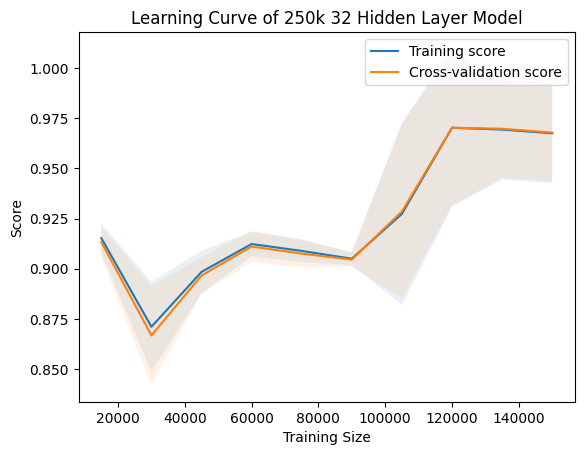

In [47]:
# 100k 32

# Obtenemos los scores de entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_sizes_100k, train_scores_100k, valid_scores_100k = learning_curve(model_100k_32, X_train_100k, Y_train_100k, train_sizes=train_sizes, verbose=3)
print(f"Train scores: {train_scores_100k}")
print(f"Valid scores: {valid_scores_100k}")

# Calculamos las medias y desviaciones estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores_100k, axis=1)
train_std = np.std(train_scores_100k, axis=1)
valid_mean = np.mean(valid_scores_100k, axis=1)
valid_std = np.std(valid_scores_100k, axis=1)

print(f"Train_mean: {train_mean}")
print(f"Train_std: {train_std}")
print(f"valid_mean: {valid_mean}")
print(f"valid_std: {valid_std}")
# Graficamos la curva de entrenamiento
plt.plot(train_sizes_100k, train_mean, label='Training score')
plt.plot(train_sizes_100k, valid_mean, label='Cross-validation score')

# Agregamos las bandas de incertidumbre
plt.fill_between(train_sizes_100k, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes_100k, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

# Agregamos etiquetas y leyenda
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of 250k 32 Hidden Layer Model')
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

[learning_curve] Training set sizes: [ 15000  30000  45000  60000  75000  90000 105000 120000 135000 150000]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.803, test=0.801) total time=   2.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] END ..................., score=(train=0.921, test=0.922) total time=   4.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] END ..................., score=(train=0.868, test=0.867) total time=   3.4s
[CV] END ..................., score=(train=0.908, test=0.908) total time=   4.4s
[CV] END ..................., score=(train=0.919, test=0.920) total time=   7.0s
[CV] END ..................., score=(train=0.920, test=0.921) total time=  20.8s
[CV] END ..................., score=(train=0.900, test=0.900) total time=  10.3s
[CV] END ..................., score=(train=0.917, test=0.917) total time=  16.1s
[CV] END ..................., score=(train=0.923, test=0.924) total time=  21.6s
[CV] END ..................., score=(train=0.915, test=0.916) total time=  14.0s
[CV] END ..................., score=(train=0.894, test=0.886) total time=   1.8s
[CV] END ..................., score=(train=0.911, test=0.906) total time=   2.2s
[CV] END ..................., score=(train=0.904, test=0.903) total time=   5.1s
[CV] END ..................., score=(train=0.906, test=0.903) total time=  13.4s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.9min finished


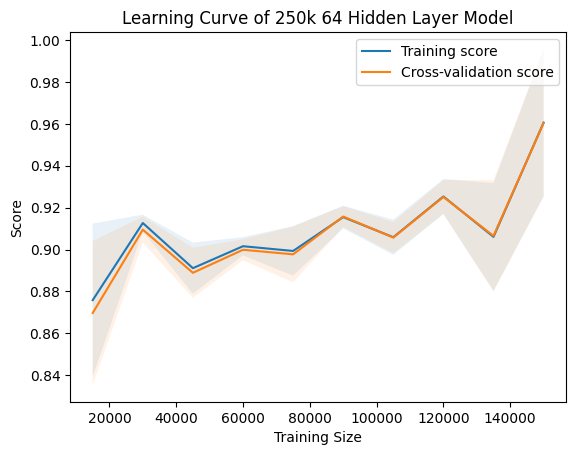

In [48]:
# 100k 64

# Obtenemos los scores de entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_sizes_100k, train_scores_100k, valid_scores_100k = learning_curve(model_100k_64, X_train_100k, Y_train_100k, train_sizes=train_sizes, verbose=3)
print(f"Train scores: {train_scores_100k}")
print(f"Valid scores: {valid_scores_100k}")

# Calculamos las medias y desviaciones estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores_100k, axis=1)
train_std = np.std(train_scores_100k, axis=1)
valid_mean = np.mean(valid_scores_100k, axis=1)
valid_std = np.std(valid_scores_100k, axis=1)

print(f"Train_mean: {train_mean}")
print(f"Train_std: {train_std}")
print(f"valid_mean: {valid_mean}")
print(f"valid_std: {valid_std}")

# Graficamos la curva de entrenamiento
plt.plot(train_sizes_100k, train_mean, label='Training score')
plt.plot(train_sizes_100k, valid_mean, label='Cross-validation score')

# Agregamos las bandas de incertidumbre
plt.fill_between(train_sizes_100k, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes_100k, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

# Agregamos etiquetas y leyenda
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of 250k 64 Hidden Layer Model')
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

[learning_curve] Training set sizes: [ 3000  6000  9000 12000 15000 18000 21000 24000 27000 30000]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.933, test=0.921) total time=   0.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] END ..................., score=(train=0.906, test=0.899) total time=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] END ..................., score=(train=0.902, test=0.895) total time=   1.2s
[CV] END ..................., score=(train=0.915, test=0.915) total time=   1.4s
[CV] END ..................., score=(train=0.918, test=0.914) total time=   1.3s
[CV] END ..................., score=(train=0.925, test=0.921) total time=   2.1s
[CV] END ..................., score=(train=0.921, test=0.918) total time=   1.6s
[CV] END ..................., score=(train=0.880, test=0.877) total time=   2.4s
[CV] END ..................., score=(train=0.920, test=0.920) total time=   1.9s
[CV] END ..................., score=(train=0.907, test=0.904) total time=   2.4s
[CV] END ..................., score=(train=0.902, test=0.889) total time=   0.3s
[CV] END ..................., score=(train=0.870, test=0.876) total time=   1.0s
[CV] END ..................., score=(train=0.905, test=0.907) total time=   0.8s
[CV] END ..................., score=(train=0.919, test=0.920) total time=   1.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


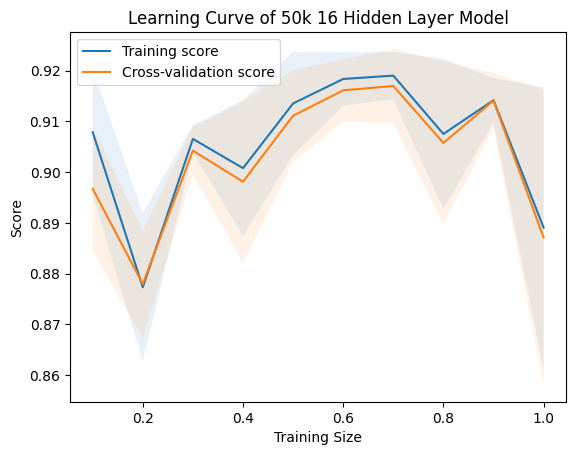

In [49]:
# 50k 16

# Obtenemos los scores de entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_sizes_50k, train_scores_50k, valid_scores_50k = learning_curve(model_50k_16, X_train_50k, Y_train_50k, train_sizes=train_sizes, verbose=3)
print(f"Train scores: {train_scores_50k}")
print(f"Valid scores: {valid_scores_50k}")

# Calculamos las medias y desviaciones estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores_50k, axis=1)
train_std = np.std(train_scores_50k, axis=1)
valid_mean = np.mean(valid_scores_50k, axis=1)
valid_std = np.std(valid_scores_50k, axis=1)

print(f"Train_mean: {train_mean}")
print(f"Train_std: {train_std}")
print(f"valid_mean: {valid_mean}")
print(f"valid_std: {valid_std}")

# Graficamos la curva de entrenamiento
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, valid_mean, label='Cross-validation score')

# Agregamos las bandas de incertidumbre
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

# Agregamos etiquetas y leyenda
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of 50k 16 Hidden Layer Model')
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

[learning_curve] Training set sizes: [ 3000  6000  9000 12000 15000 18000 21000 24000 27000 30000]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.914, test=0.898) total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ..................., score=(train=0.904, test=0.896) total time=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] END ..................., score=(train=0.924, test=0.917) total time=   0.8s
[CV] END ..................., score=(train=0.910, test=0.901) total time=   0.6s
[CV] END ..................., score=(train=0.924, test=0.920) total time=   1.4s
[CV] END ..................., score=(train=0.899, test=0.893) total time=   1.7s
[CV] END ..................., score=(train=0.918, test=0.914) total time=   1.0s
[CV] END ..................., score=(train=0.916, test=0.913) total time=   1.5s
[CV] END ..................., score=(train=0.919, test=0.917) total time=   1.2s
[CV] END ..................., score=(train=0.898, test=0.893) total time=   2.7s
[CV] END ..................., score=(train=0.882, test=0.884) total time=   0.2s
[CV] END ..................., score=(train=0.921, test=0.921) total time=   0.4s
[CV] END ..................., score=(train=0.918, test=0.915) total time=   0.5s
[CV] END ..................., score=(train=0.922, test=0.920) total time=   0.7s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.0s finished


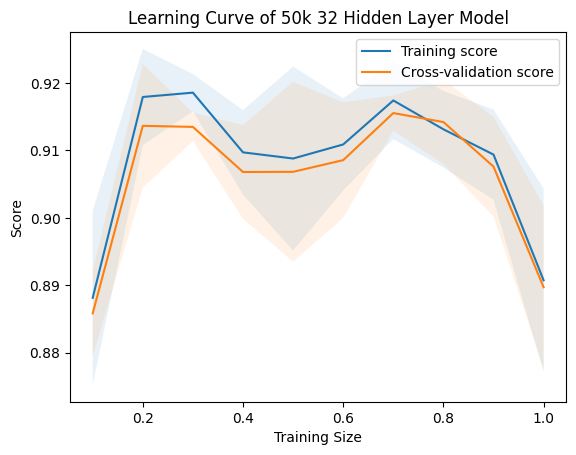

In [50]:
# 50k 32

# Obtenemos los scores de entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_sizes_50k, train_scores_50k, valid_scores_50k = learning_curve(model_50k_32, X_train_50k, Y_train_50k, train_sizes=train_sizes, verbose=3)
print(f"Train scores: {train_scores_50k}")
print(f"Valid scores: {valid_scores_50k}")

# Calculamos las medias y desviaciones estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores_50k, axis=1)
train_std = np.std(train_scores_50k, axis=1)
valid_mean = np.mean(valid_scores_50k, axis=1)
valid_std = np.std(valid_scores_50k, axis=1)

print(f"Train_mean: {train_mean}")
print(f"Train_std: {train_std}")
print(f"valid_mean: {valid_mean}")
print(f"valid_std: {valid_std}")


# Graficamos la curva de entrenamiento
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, valid_mean, label='Cross-validation score')

# Agregamos las bandas de incertidumbre
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

# Agregamos etiquetas y leyenda
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of 50k 32 Hidden Layer Model')
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

[learning_curve] Training set sizes: [ 3000  6000  9000 12000 15000 18000 21000 24000 27000 30000]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.898, test=0.890) total time=   0.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] END ..................., score=(train=0.912, test=0.909) total time=   0.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] END ..................., score=(train=0.911, test=0.908) total time=   1.0s
[CV] END ..................., score=(train=0.913, test=0.907) total time=   1.1s
[CV] END ..................., score=(train=0.914, test=0.906) total time=   2.3s
[CV] END ..................., score=(train=0.919, test=0.911) total time=   1.9s
[CV] END ..................., score=(train=0.913, test=0.909) total time=   3.4s
[CV] END ..................., score=(train=0.901, test=0.895) total time=   3.6s
[CV] END ..................., score=(train=0.920, test=0.915) total time=   3.1s
[CV] END ..................., score=(train=0.911, test=0.910) total time=   3.8s
[CV] END ..................., score=(train=0.910, test=0.895) total time=   0.5s
[CV] END ..................., score=(train=0.840, test=0.846) total time=   1.5s
[CV] END ..................., score=(train=0.906, test=0.902) total time=   1.6s
[CV] END ..................., score=(train=0.832, test=0.840) total time=   1.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


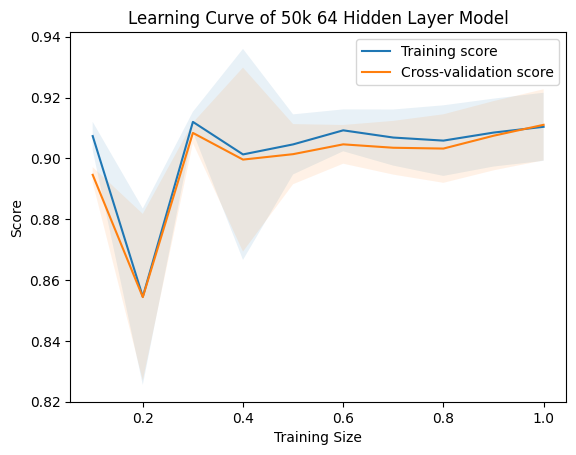

In [51]:
# 50k 64

# Obtenemos los scores de entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_sizes_50k, train_scores_50k, valid_scores_50k = learning_curve(model_50k_64, X_train_50k, Y_train_50k, train_sizes=train_sizes, verbose=3)
print(f"Train scores: {train_scores_50k}")
print(f"Valid scores: {valid_scores_50k}")

# Calculamos las medias y desviaciones estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores_50k, axis=1)
train_std = np.std(train_scores_50k, axis=1)
valid_mean = np.mean(valid_scores_50k, axis=1)
valid_std = np.std(valid_scores_50k, axis=1)

print(f"Train_mean: {train_mean}")
print(f"Train_std: {train_std}")
print(f"valid_mean: {valid_mean}")
print(f"valid_std: {valid_std}")


# Graficamos la curva de entrenamiento
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, valid_mean, label='Cross-validation score')

# Agregamos las bandas de incertidumbre
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

# Agregamos etiquetas y leyenda
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of 50k 64 Hidden Layer Model')
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

[learning_curve] Training set sizes: [ 600 1200 1800 2400 3000 3600 4200 4800 5400 6000]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.937, test=0.893) total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ..................., score=(train=0.917, test=0.891) total time=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] END ..................., score=(train=0.916, test=0.896) total time=   0.4s
[CV] END ..................., score=(train=0.902, test=0.890) total time=   0.3s
[CV] END ..................., score=(train=0.914, test=0.900) total time=   0.5s
[CV] END ..................., score=(train=0.901, test=0.909) total time=   0.5s
[CV] END ..................., score=(train=0.918, test=0.917) total time=   0.8s
[CV] END ..................., score=(train=0.910, test=0.911) total time=   0.9s
[CV] END ..................., score=(train=0.910, test=0.913) total time=   0.8s
[CV] END ..................., score=(train=0.897, test=0.895) total time=   0.7s
[CV] END ..................., score=(train=0.898, test=0.881) total time=   0.2s
[CV] END ..................., score=(train=0.889, test=0.877) total time=   0.1s
[CV] END ..................., score=(train=0.911, test=0.896) total time=   0.3s
[CV] END ..................., score=(train=0.919, test=0.907) total time=   0.4s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   32.3s finished


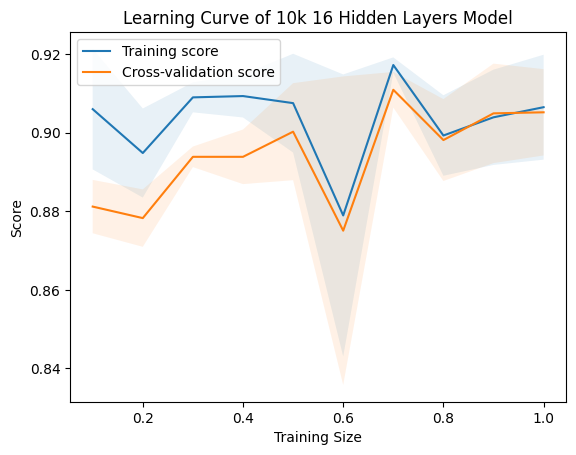

In [34]:
# 10k 16

# Obtenemos los scores de entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_sizes_10k, train_scores_10k, valid_scores_10k = learning_curve(model_10k_16, X_train_10k, Y_train_10k, train_sizes=train_sizes, verbose=3)
print(f"Train scores: {train_scores_10k}")
print(f"Valid scores: {valid_scores_10k}")

# Calculamos las medias y desviaciones estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores_10k, axis=1)
train_std = np.std(train_scores_10k, axis=1)
valid_mean = np.mean(valid_scores_10k, axis=1)
valid_std = np.std(valid_scores_10k, axis=1)

print(f"Train_mean: {train_mean}")
print(f"Train_std: {train_std}")
print(f"valid_mean: {valid_mean}")
print(f"valid_std: {valid_std}")

# Graficamos la curva de entrenamiento
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, valid_mean, label='Cross-validation score')

# Agregamos las bandas de incertidumbre
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

# Agregamos etiquetas y leyenda
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of 10k 16 Hidden Layers Model')
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

In [40]:
np.mean([0.01533333, 0.01133333, 0.00380708, 0.00544926, 0.01257087, 0.03589052, 0.00193781, 0.01024153, 0.01212328, 0.01335249])

0.012203950000000002

[learning_curve] Training set sizes: [ 600 1200 1800 2400 3000 3600 4200 4800 5400 6000]
[CV] END ..................., score=(train=0.945, test=0.895) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END ..................., score=(train=0.861, test=0.829) total time=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] END ..................., score=(train=0.919, test=0.909) total time=   0.2s
[CV] END ..................., score=(train=0.908, test=0.899) total time=   0.2s
[CV] END ..................., score=(train=0.903, test=0.893) total time=   0.2s
[CV] END ..................., score=(train=0.914, test=0.909) total time=   0.3s
[CV] END ..................., score=(train=0.916, test=0.906) total time=   0.4s
[CV] END ..................., score=(train=0.912, test=0.910) total time=   0.4s
[CV] END ..................., score=(train=0.874, test=0.872) total time=   0.4s
[CV] END ..................., score=(train=0.900, test=0.898) total time=   0.3s
[CV] END ..................., score=(train=0.912, test=0.893) total time=   0.0s
[CV] END ..................., score=(train=0.894, test=0.889) total time=   0.1s
[CV] END ..................., score=(train=0.922, test=0.903) total time=   0.2s
[CV] END ..................., score=(train=0.846, test=0.847) total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.0s finished


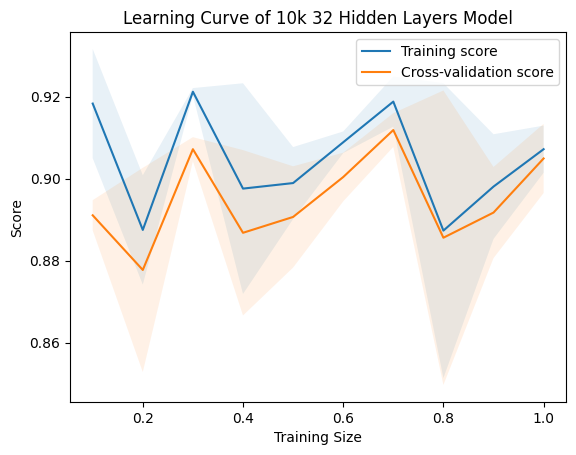

In [33]:
# 10k 32

# Obtenemos los scores de entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_sizes_10k, train_scores_10k, valid_scores_10k = learning_curve(model_10k_32, X_train_10k, Y_train_10k, train_sizes=train_sizes, verbose=3)
print(f"Train scores: {train_scores_10k}")
print(f"Valid scores: {valid_scores_10k}")

# Calculamos las medias y desviaciones estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores_10k, axis=1)
train_std = np.std(train_scores_10k, axis=1)
valid_mean = np.mean(valid_scores_10k, axis=1)
valid_std = np.std(valid_scores_10k, axis=1)

print(f"Train_mean: {train_mean}")
print(f"Train_std: {train_std}")
print(f"valid_mean: {valid_mean}")
print(f"valid_std: {valid_std}")

# Graficamos la curva de entrenamiento
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, valid_mean, label='Cross-validation score')

# Agregamos las bandas de incertidumbre
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

# Agregamos etiquetas y leyenda
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of 10k 32 Hidden Layers Model')
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

In [38]:
np.mean([0.89106667, 0.87773333, 0.9072,     0.8868,     0.89066667, 0.9004, 0.91186667, 0.8856,     0.89173333, 0.90493333])

0.8948

[learning_curve] Training set sizes: [ 600 1200 1800 2400 3000 3600 4200 4800 5400 6000]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.848, test=0.849) total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ..................., score=(train=0.877, test=0.907) total time=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] END ..................., score=(train=0.874, test=0.893) total time=   0.3s
[CV] END ..................., score=(train=0.879, test=0.895) total time=   0.7s
[CV] END ..................., score=(train=0.918, test=0.919) total time=   0.4s
[CV] END ..................., score=(train=0.917, test=0.924) total time=   0.5s
[CV] END ..................., score=(train=0.918, test=0.930) total time=   0.6s
[CV] END ..................., score=(train=0.912, test=0.927) total time=   0.6s
[CV] END ..................., score=(train=0.921, test=0.932) total time=   0.9s
[CV] END ..................., score=(train=0.901, test=0.905) total time=   1.2s
[CV] END ..................., score=(train=0.888, test=0.838) total time=   0.2s
[CV] END ..................., score=(train=0.887, test=0.896) total time=   0.2s
[CV] END ..................., score=(train=0.888, test=0.891) total time=   0.3s
[CV] END ..................., score=(train=0.927, test=0.915) total time=   0.5s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.0s finished


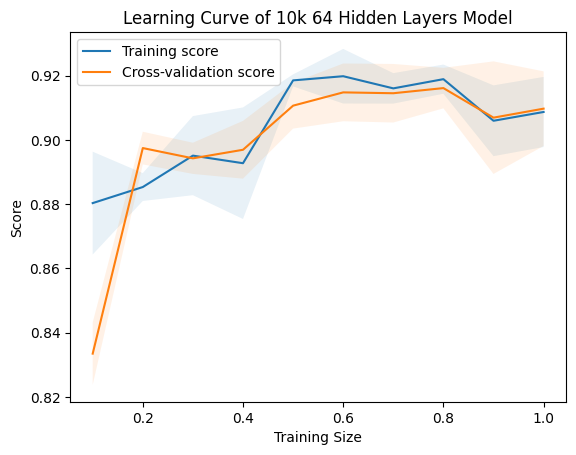

In [54]:
# 10k 64

# Obtenemos los scores de entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_sizes_10k, train_scores_10k, valid_scores_10k = learning_curve(model_10k_64, X_train_10k, Y_train_10k, train_sizes=train_sizes, verbose=3)
print(f"Train scores: {train_scores_10k}")
print(f"Valid scores: {valid_scores_10k}")

# Calculamos las medias y desviaciones estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores_10k, axis=1)
train_std = np.std(train_scores_10k, axis=1)
valid_mean = np.mean(valid_scores_10k, axis=1)
valid_std = np.std(valid_scores_10k, axis=1)

print(f"Train_mean: {train_mean}")
print(f"Train_std: {train_std}")
print(f"valid_mean: {valid_mean}")
print(f"valid_std: {valid_std}")

# Graficamos la curva de entrenamiento
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, valid_mean, label='Cross-validation score')

# Agregamos las bandas de incertidumbre
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

# Agregamos etiquetas y leyenda
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of 10k 64 Hidden Layers Model')
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

In [47]:
# Definir casos de prueba
# Caso = [Fase, Cant. Veh. Agustinas, Espera Agustinas, Cant. Veh. Morandé, Espera Morandé]
# Fases = {0: Fase Morandé, 1: Fase Agustinas, 2: Fase Peatonal}
# Resultado = {0: No requiere cambios en la fase, 1: Requiere cambios de fase}

# 1. Caso "espera larga en Agustinas" - Res. Esperado = 1
# Fase = 0, Veh. Agustinas = 7, Esp. Agustinas = 1200, Veh. Morandé = 0, Esp. Morandé = 0
case_1 = [0,10,1400,0,0]

# 2. Caso "espera corta en Agustinas" - Res. Esperado = 0
# Fase = 0, Veh. Agustinas = 5, Esp. Agustinas = 400, Veh. Morandé = 0, Esp. Morandé = 0
case_2 = [0,4,400,0,0]

# 3. Caso "espera larga en Morandé" - Res. Esperado = 1
# Fase = 1, Veh. Agustinas = 1, Esp. Agustinas = 0, Veh. Morandé = 7, Esp. Morandé = 1400
case_3 = [1,1,0,10,1400]

# 4. Caso "espera corta en Morandé" - Res. Esperado = 0
# Fase = 1, Veh. Agustinas = 1, Esp. Agustinas = 0, Veh. Morandé = 5, Esp. Morandé = 400
case_4 = [1,1,0,4,400]

# 5. Caso "espera larga en Agustinas con flujo vehículos en Morandé" - Res. Esperado = 0
# Fase = 0, Veh. Agustinas = 7, Esp. Agustinas = 1200, Veh. Morandé = 7, Esp. Morandé = 0
case_5 = [0,10,1400,7,0]

# 6. Caso "espera corta en Agustinas con flujo vehículos en Morandé" - Res. Esperado = 0
# Fase = 0, Veh. Agustinas = 5, Esp. Agustinas = 400, Veh. Morandé = 7, Esp. Morandé = 0
case_6 = [0,5,400,7,0]

# 7. Caso "espera larga en Morandé con flujo vehículos en Agustinas" - Res. Esperado = 0
# Fase = 0, Veh. Agustinas = 7, Esp. Agustinas = 0, Veh. Morandé = 7, Esp. Morandé = 1200
case_7 = [0,7,1200,7,0]

# 8. Caso "espera corta en Morandé con flujo vehículos en Agustinas" - Res. Esperado = 0
# Fase = 0, Veh. Agustinas = 7, Esp. Agustinas = 0, Veh. Morandé = 5, Esp. Morandé = 400
case_8 = [0,5,400,7,0]

# 9. Caso "0 0 0 0 0" - Res. Esperado = 0
# Fase = 0, Veh. Agustinas = 7, Esp. Agustinas = 0, Veh. Morandé = 5, Esp. Morandé = 400
case_9 = [0,0,0,0,0]

# 10. Caso "espera larga en Morandé" - Res. Esperado = 1
# Fase = 1, Veh. Agustinas = 1, Esp. Agustinas = 0, Veh. Morandé = 7, Esp. Morandé = 1200
case_10 = [1,1,0,10,1492]

# 11. Caso "espera larga en Agustinas" - Res. Esperado = 1
# Fase = 1, Veh. Agustinas = 1, Esp. Agustinas = 0, Veh. Morandé = 7, Esp. Morandé = 1200
case_11 = [0,8,1492,0,0]


# Resultados esperados: [1,0,1,0,0,0,0,0,0,1,1]

test_cases = np.array([case_1, case_2, case_3, case_4, case_5, case_6, case_7, case_8, case_9, case_10, case_11])

In [76]:
a = np.array([[1,0,0,10,1500]])
test_pred = model_100k_64.predict(a)
print(test_pred)

[0]


In [43]:
test_pred_16 = model_10k_16.predict(test_cases)
print(test_pred_16)

test_pred_32 = model_10k_32.predict(test_cases)
print(test_pred_32)

test_pred_64 = model_10k_64.predict(test_cases)
print(test_pred_64)

[0 0 1 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0]


In [46]:
test_pred_16 = model_50k_16.predict(test_cases)
print(test_pred_16)

test_pred_32 = model_50k_32.predict(test_cases)
print(test_pred_32)

test_pred_64 = model_50k_64.predict(test_cases)
print(test_pred_64)

NameError: name 'test_cases' is not defined

In [48]:
test_pred_16 = model_100k_16.predict(test_cases)
print(test_pred_16)

test_pred_32 = model_100k_32.predict(test_cases)
print(test_pred_32)

test_pred_64 = model_100k_64.predict(test_cases)
print(test_pred_64)

[1 0 1 0 0 0 0 0 0 1 1]
[1 1 1 0 0 0 0 0 0 1 1]
[1 0 1 0 0 0 0 0 0 1 1]


In [5]:
# Probar con el set de datos real.

# Leer los archivos LOG y almacenarlos en dataframes independientes
df_agustinas = pd.read_csv("Log_Agustinas.txt", sep=" ", header=None, usecols=[0,1,2,3,4])
df_morande = pd.read_csv("Log_Morande.txt", sep=" ", header=None, usecols=[0,1,2,3,4])
# Insertar headers de las columnas 
df_agustinas.columns = ["frame", "sem_fase", "veh_agus", "ped_agus", "wait_agus"]
df_morande.columns = ["frame", "sem_fase", "veh_mor", "ped_mor", "wait_mor"]
# Realizar merge del tensor de datos
merged_df = pd.merge(df_agustinas, df_morande, on="frame") 

# Modificar nombres de columnas
merged_df = merged_df.rename(columns={'sem_fase_x': 'sem_fase'})
merged_df = merged_df.drop('sem_fase_y', axis=1)

# print(merged_df)

df = merged_df

# Cleaning the data

# Vamos a hacer drop de las columnas que indican la cantidad de peatones. 

# df = df.drop('frame', axis=1)
df = df.drop('ped_agus', axis=1)
df = df.drop('ped_mor', axis=1)

# Función que permite categorizar una nueva columna y establecer
# las reglas para para el modelo de descición

# Nota: 
# Fase 1 - fase Agustinas
# Fase 2 - fase peatonal
# Fase 0 - fase Morandé 

df['Y'] = df.apply(reglas_optimizacion, axis=1)

print(df)

      frame  sem_fase  veh_agus  wait_agus  veh_mor  wait_mor  Y
0         1         1         0          0        0         0  0
1         2         1         0          0        0         0  0
2         3         1         4          0        3         0  0
3         4         1         4          0        3         1  0
4         5         1         4          4        3         4  0
...     ...       ...       ...        ...      ...       ... ..
6808   6809         2         8        517        6      1643  0
6809   6810         2         9        522        6      1649  0
6810   6811         2         9        528        6      1655  0
6811   6812         2         9        534        6      1662  0
6812   6813         2         9        537        6      1190  0

[6813 rows x 7 columns]


In [6]:
df["Y"].mean()

0.10318508733303977

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6813 entries, 0 to 6812
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   frame         6813 non-null   int64
 1   sem_fase      6813 non-null   int64
 2   veh_agus      6813 non-null   int64
 3   wait_agus     6813 non-null   int64
 4   veh_mor       6813 non-null   int64
 5   wait_mor      6813 non-null   int64
 6   Y             6813 non-null   int64
 7   Model Result  6813 non-null   int64
dtypes: int64(8)
memory usage: 479.0 KB


In [60]:
df.describe()

,frame,sem_fase,veh_agus,wait_agus,veh_mor,wait_mor,Y,Model Result
count,6813.000000,6813.000000,6813.000000,6813.000000,6813.000000,6813.000000,6813.000000,6813.000000
mean,3407.000000,0.881697,7.255541,304.222222,2.910172,224.334214,0.103185,0.108469
std,1966.888024,0.775681,3.565388,406.661635,2.069585,365.338571,0.304223,0.310995
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1704.000000,0.000000,4.000000,12.000000,1.000000,2.000000,0.000000,0.000000
50%,3407.000000,1.000000,8.000000,103.000000,3.000000,11.000000,0.000000,0.000000
75%,5110.000000,1.000000,10.000000,470.000000,4.000000,326.000000,0.000000,0.000000
max,6813.000000,2.000000,16.000000,1995.000000,10.000000,1662.000000,1.000000,1.000000


In [16]:
# Preparar cada frame como un caso a para probar el mejor modelo.
model_100k_64_loaded = joblib.load('mlp_model_100k_64.pkl')

def test_model(df):
    frame = np.array([[df['sem_fase'], df['veh_agus'], df['wait_agus'], df['veh_mor'], df['wait_mor']]])
    result = model_100k_64_loaded.predict(frame)
    if result[0] == 1:
        print(f"Result: {result} in frame: {df['frame']}")
        return 1
    else:
        return 0

In [44]:
df['Model Result'] = df.apply(test_model, axis=1)

NameError: name 'df' is not defined

In [19]:
df.to_excel("df_final.xlsx", index=False)

In [103]:
# Una vez probado el modelo, lo exportaremos.

# Exportar el modelo entrenado utilizando joblib
joblib.dump(model_100k_64, 'mlp_model_100k_64.pkl')

['mlp_model_100k_64.pkl']